<a href="https://colab.research.google.com/github/diajengca/rock-paper-scissors-classification/blob/main/Rock_Paper_Scissors_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from google.colab import drive
import os
import matplotlib.pyplot as plt
import numpy as np

Import Image Dataset

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = "/content/rockpaperscissors"
!unzip -u "/content/drive/My Drive/Dataset/rockpaperscissors.zip" -d "/content/rockpaperscissors"

Archive:  /content/drive/My Drive/Dataset/rockpaperscissors.zip
   creating: /content/rockpaperscissors/paper/
  inflating: /content/rockpaperscissors/paper/04l5I8TqdzF9WDMJ.png  
  inflating: /content/rockpaperscissors/paper/0a3UtNzl5Ll3sq8K.png  
  inflating: /content/rockpaperscissors/paper/0cb6cVL8pkfi4wF6.png  
 extracting: /content/rockpaperscissors/paper/0eqArS2GgsBeqgSn.png  
 extracting: /content/rockpaperscissors/paper/0Og76sl5CJhbxWWx.png  
  inflating: /content/rockpaperscissors/paper/0RA9rcrv8iVvuDDU.png  
  inflating: /content/rockpaperscissors/paper/0t08v9bAaA0mXGCQ.png  
  inflating: /content/rockpaperscissors/paper/0Uomd0HvOB33m47I.png  
  inflating: /content/rockpaperscissors/paper/0vugygEjxQJPr9yz.png  
  inflating: /content/rockpaperscissors/paper/0zKU6wEhT2cDe9j0.png  
  inflating: /content/rockpaperscissors/paper/14K62H4KG1hg5qiJ.png  
  inflating: /content/rockpaperscissors/paper/1Dfw5FRlS4h60JPX.png  
  inflating: /content/rockpaperscissors/paper/1fKclJk4eBWOQSR

In [ ]:
labels = [ dirs for (root,dirs,files) in os.walk(data_dir) ][0]
BATCH_SIZE = 32
IMAGE_SIZE = (180, 180)

Create dataset

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, labels="inferred", label_mode='categorical', class_names=labels,
    color_mode='rgb', batch_size=BATCH_SIZE, image_size=IMAGE_SIZE,
    shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, labels="inferred", label_mode='categorical', class_names=labels,
    color_mode='rgb', batch_size=BATCH_SIZE, image_size=IMAGE_SIZE,
    shuffle=False, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False
)

Found 2188 files belonging to 3 classes.
Using 1751 files for training.
Found 2188 files belonging to 3 classes.
Using 437 files for validation.


Explore dataset

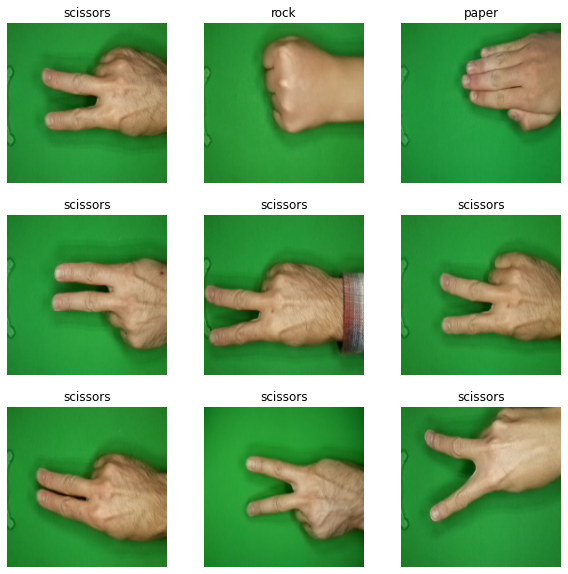

In [ ]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(np.array(labels[i]))])
        plt.axis("off")

Build Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=7, verbose=2)

Epoch 1/7
55/55 - 115s - loss: 0.7619 - accuracy: 0.6471 - val_loss: 0.6433 - val_accuracy: 0.7414
Epoch 2/7
55/55 - 112s - loss: 0.2529 - accuracy: 0.9092 - val_loss: 0.2886 - val_accuracy: 0.8970
Epoch 3/7
55/55 - 112s - loss: 0.1319 - accuracy: 0.9515 - val_loss: 0.0895 - val_accuracy: 0.9771
Epoch 4/7
55/55 - 112s - loss: 0.0685 - accuracy: 0.9783 - val_loss: 0.1641 - val_accuracy: 0.9565
Epoch 5/7
55/55 - 117s - loss: 0.0435 - accuracy: 0.9891 - val_loss: 0.0311 - val_accuracy: 0.9863
Epoch 6/7
55/55 - 112s - loss: 0.0258 - accuracy: 0.9926 - val_loss: 0.0455 - val_accuracy: 0.9863
Epoch 7/7
55/55 - 112s - loss: 0.0165 - accuracy: 0.9931 - val_loss: 0.0352 - val_accuracy: 0.9954
